In [118]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [35]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [36]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [37]:
print(kurtosis(data.YearsExperience))
print(kurtosis(data.Salary))


-1.0447521989892943
-1.2829125042427751


In [38]:
print(skew(data.YearsExperience))
print(skew(data.Salary))

0.3603123252525561
0.3361618825592921


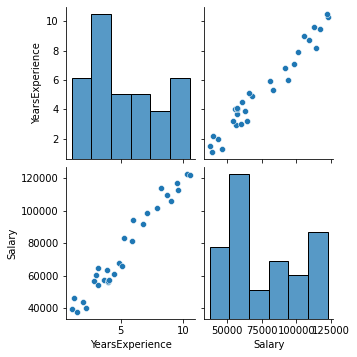

In [39]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data)

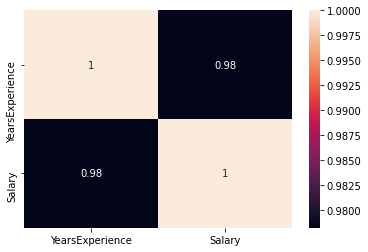

In [40]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

<AxesSubplot:>

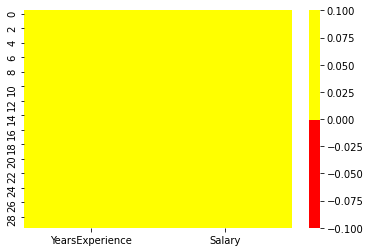

In [41]:
import seaborn as sns
cols = data.columns 
colours = ['#FF0000', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

#no null values

<AxesSubplot:>

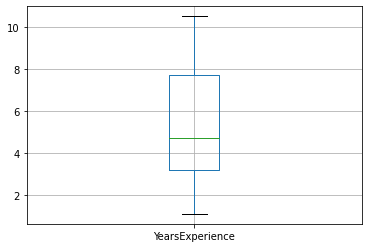

In [42]:
#Box plot
data.boxplot(column=['YearsExperience'])

<AxesSubplot:>

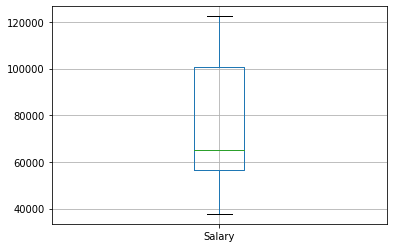

In [43]:
#Box plot
data.boxplot(column=['Salary'])  #no outlier

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

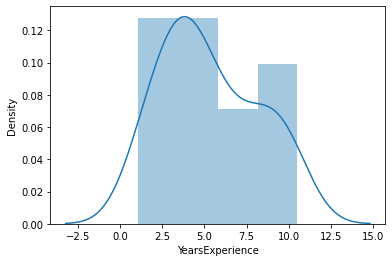

In [44]:
import seaborn as sns
sns.distplot(data['YearsExperience'])

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

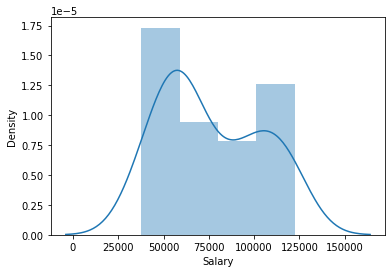

In [45]:
import seaborn as sns
sns.distplot(data['Salary'])

In [109]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = data).fit()

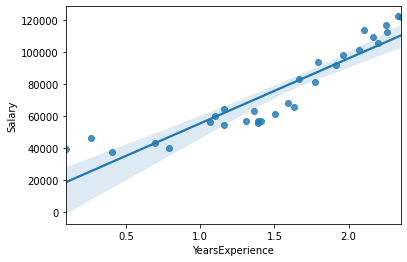

In [110]:
sns.regplot(x="YearsExperience", y="Salary", data=data);

In [111]:
#Coefficients
model.params

Intercept          14927.97177
YearsExperience    40581.98796
dtype: float64

In [112]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept           2.895135
YearsExperience    12.791989
dtype: float64 
 Intercept          7.268813e-03
YearsExperience    3.250155e-13
dtype: float64


In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           3.25e-13
Time:                        16:44:55   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
YearsExperience  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


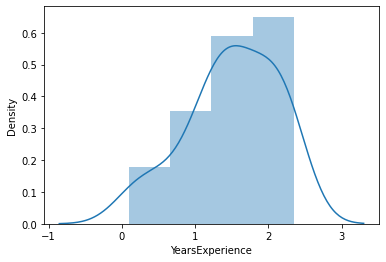

<Figure size 432x288 with 0 Axes>

In [120]:
data_1=data
data_1['YearsExperience'] = np.log(data_1['YearsExperience'])
data_1['Salary'] = np.log(data_1['Salary'])
sns.distplot(data_1['YearsExperience'])
fig = plt.figure()

In [125]:
model_2 = smf.ols("Salary~YearsExperience",data = data_1).fit()

In [126]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           7.40e-16
Time:                        16:56:27   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.3280      0.056    184.868      0.000      10.214      10.442
YearsExperience     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
#R squared values
(model_2.rsquared,model_2.rsquared_adj)

(0.9052150725817149, 0.9018298966024904)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


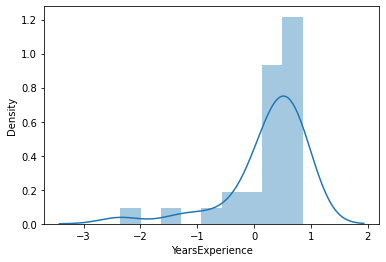

<Figure size 432x288 with 0 Axes>

In [129]:
data_2=data
data_2['YearsExperience'] = np.log(data['YearsExperience'])
sns.distplot(data['YearsExperience'])
fig = plt.figure()

In [130]:
model = smf.ols("Salary~X",data = data_2).fit()

In [131]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     46.48
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           2.09e-07
Time:                        16:57:40   Log-Likelihood:                 2.5416
No. Observations:                  30   AIC:                            -1.083
Df Residuals:                      28   BIC:                             1.719
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0702      0.045    247.741      0.000      10.979      11.162
X              0.4124      0.060      6.818      0.000       0.288       0.536
==============================================================================
Omnibus:                        4.775   Durbin-Watson:                   0.341
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                1.877
Skew:                           0.209   Prob(JB):                        0.391
Kurtosis:                       1.848   Cond. No.                         1.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


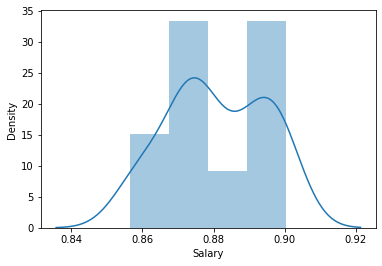

<Figure size 432x288 with 0 Axes>

In [133]:
data_3=data
data_3['Salary'] = np.log(data['Salary'])
sns.distplot(data['Salary'])
fig = plt.figure()

In [136]:
model_3 = smf.ols("Salary~X",data = data_3).fit()

In [137]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     48.79
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           1.35e-07
Time:                        16:59:37   Log-Likelihood:                 101.77
No. Observations:                  30   AIC:                            -199.5
Df Residuals:                      28   BIC:                            -196.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8769      0.002    536.154      0.000       0.874       0.880
X              0.0155      0.002      6.985      0.000       0.011       0.020
==============================================================================
Omnibus:                        4.044   Durbin-Watson:                   0.363
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                1.700
Skew:                           0.177   Prob(JB):                        0.427
Kurtosis:                       1.889   Cond. No.                         1.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(data[['YearsExperience']])
train_y = np.asanyarray(data[['Salary']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[40581.98795978]]
Intercept:  [14927.97177006]


In [102]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(data[['YearsExperience']])
test_y = np.asanyarray(data[['Salary']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 8443.58
Residual sum of squares (MSE): 106149618.72
R2-score: 0.83
